# Notebook for the Inventory Management Problem
## Goodness of approximating $\bar I$ with $\bar I_\gamma$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from inventory import Inventory
from attacker import *
from utils import *
from mpl_toolkits.mplot3d import Axes3D

In [3]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": True,  # use inline math for ticks
    "pgf.rcfonts": False,  # don't setup fonts from rc parameters
    "legend.fontsize": 14})
plt.rcParams['pgf.preamble'] = r"\\usepackage{units} \\usepackage{amsmath} \\usepackage{metalogo} \\usepackage{unicode-math} \\setmainfont{DejaVu Serif} \\setmathfont{xits-math.otf}"
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Setup problem

In [3]:
inventory_size = 35
gamma = 0.95
env = Inventory(inventory_size)
dim_state, dim_action = env.P.shape[0], env.P.shape[1]
V, pi = value_iteration(env, gamma)

## Compute plot

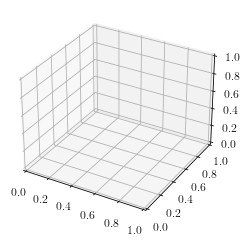

In [4]:
def fun(env, pi, gamma_bar, epsilon):
    res, phi, mud = compute_randomized_attack(gamma_bar, epsilon, env.P, -env.R, pi)
    mu = compute_stationary_distribution(env.P, phi)
    I, Ibar = compute_I(mu, env.P, pi, phi)
    Igamma, Ibar_gamma = compute_I_gamma(mud, env.P, pi, phi)
    return I-Igamma, Ibar - Ibar_gamma

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
epsilons = np.linspace(1e-4, 0.5, 50)
gammas = np.linspace(0.1, 0.99, 50)
X, Y = np.meshgrid(gammas, epsilons)
zI = []
zIbar = []
for x, y in zip(np.ravel(X), np.ravel(Y)):
    z1, z2 = fun(env, pi, x, y)
    zI.append(z1)
    zIbar.append(z2)
zI = np.array(zI)
zIbar = np.array(zIbar)
ZI = zI.reshape(X.shape)
ZIbar = zIbar.reshape(X.shape)


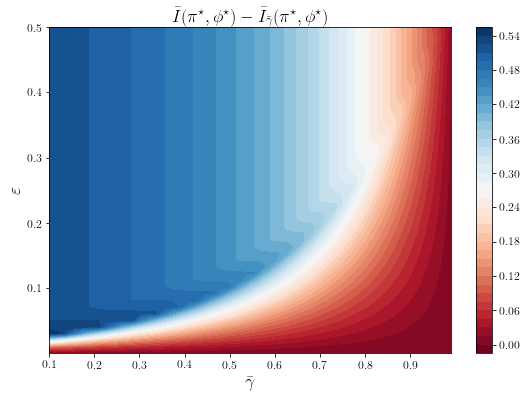

<Figure size 432x288 with 0 Axes>

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))

zc = ax.contourf(X,Y,ZIbar,levels=50,cmap='RdBu')
ax.set_xlabel(r'$\bar\gamma$')
ax.set_ylabel(r'$\varepsilon$')
ax.set_title(r'$ \bar I(\pi^\star,\phi^\star) - \bar I_{\bar \gamma}(\pi^\star,\phi^\star)$')

plt.colorbar(zc, ax=ax)
plt.show()

plt.savefig("inventory_Igamma_final.pdf",bbox_inches="tight")

## Save the data

In [7]:
import pickle

data = {'X': X,
     'Y': Y,
     'ZI': ZI,
     'ZIbar': ZIbar}

with open('data_Igamma.pkl', 'wb') as handle:
    pickle.dump(data, handle)
